In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.spatial.distance import cdist, euclidean
from KMeans import KMeans
from sklearn.cluster import KMeans as SKKMeans

In [2]:
random.seed(84)
data = np.array([
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
        [random.randint(0, 10), random.randint(0, 10)],
])

data

array([[ 4,  0],
       [ 7,  0],
       [ 8, 10],
       [ 5,  3],
       [ 7,  7],
       [ 8,  5],
       [ 9,  2],
       [ 8,  4],
       [ 8,  7],
       [ 6,  5],
       [ 9,  3],
       [ 2, 10],
       [ 7,  0],
       [ 8,  0],
       [ 2,  0],
       [ 7,  8],
       [10,  4],
       [ 8,  1],
       [ 0,  3],
       [ 3,  6],
       [ 2,  4],
       [ 1,  4],
       [ 1,  1],
       [ 8,  1],
       [ 7,  8]])

In [3]:
x = []
y = []
for i, j in data:
    x.append(i)
    y.append(j)
    
x

[4, 7, 8, 5, 7, 8, 9, 8, 8, 6, 9, 2, 7, 8, 2, 7, 10, 8, 0, 3, 2, 1, 1, 8, 7]

In [4]:
y

[0, 0, 10, 3, 7, 5, 2, 4, 7, 5, 3, 10, 0, 0, 0, 8, 4, 1, 3, 6, 4, 4, 1, 1, 8]

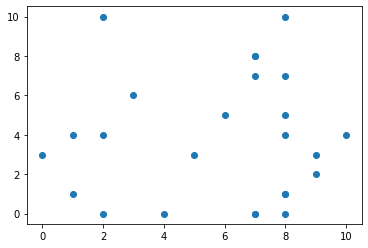

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
df = pd.DataFrame({"x" : x, "y" : y})

print(df.shape)
df

(25, 2)


,x,y
0,4,0
1,7,0
2,8,10
3,5,3
4,7,7
5,8,5
6,9,2
7,8,4
8,8,7
9,6,5


In [10]:
kmeans = KMeans(n_clusters=2, n_iter=10)
kmeans_dict = kmeans.fit(data)

kmeans.clusters

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0])

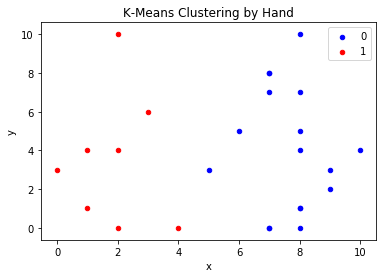

In [11]:
colors = {1 : 'red', 0 : 'blue'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering by Hand')

grouped = df.groupby(np.array(kmeans.clusters))
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()

In [12]:
skkmeans = SKKMeans(n_clusters=2)
skkmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
skkmeans = skkmeans.fit(data)
print(skkmeans.labels_)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0]


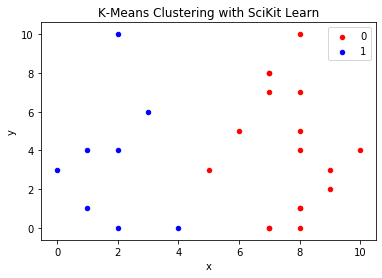

In [14]:
colors = {1 : 'blue', 0 : 'red'}

fig, ax = plt.subplots()
ax.set_title('K-Means Clustering with SciKit Learn')

grouped = df.groupby(skkmeans.labels_)
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x',
               y = 'y', label = key, color = colors[key])
plt.show()